In [4]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

Question 1

In [11]:
df['RESTAURANT'] = df[['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'BORO' ]].agg(' '.join, axis=1)
df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Question 2

In [90]:
len(df['RESTAURANT'].drop_duplicates())

10114

Question 3

In [165]:
restaurant_by_brand = df[['DBA','RESTAURANT']].drop_duplicates(subset = 'RESTAURANT')['DBA'].value_counts()
len(restaurant_by_brand[restaurant_by_brand>1])

368

In [112]:
 df[['DBA','RESTAURANT']].drop_duplicates(subset = 'RESTAURANT')

,DBA,RESTAURANT
0,WENDY'S,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,TOV KOSHER KITCHEN,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,BRUNOS ON THE BOULEVARD,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
16,MAY MAY KITCHEN,MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN
22,SEUDA FOODS,SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN
...,...,...
44621,Andy's Cuisine Restaurant,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44622,YUMMY SZECHUAN HOUSE,YUMMY SZECHUAN HOUSE 4026 UNION ST 11354 QUEENS
44627,NEW WORLD FAST FOOD,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS
44628,EARLY,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


Qestion 4

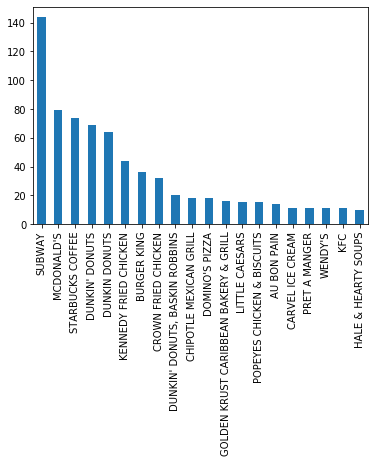

In [105]:
df[['DBA','RESTAURANT']].drop_duplicates(subset = 'RESTAURANT')['DBA'].value_counts()[:20].plot(kind='bar')

In [106]:
len(restaurant_by_brand[restaurant_by_brand>1]) / len(df['RESTAURANT'].drop_duplicates())

0.036385208621712475

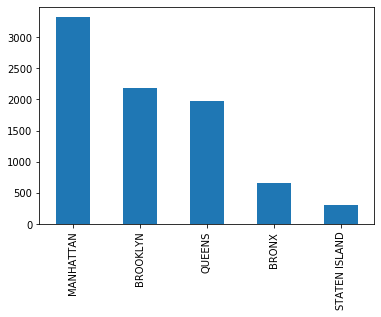

In [175]:
mask = ((df['BORO'] == 'Missing'))
df.loc[mask, 'BORO'] = np.nan

#Convert series to datafram and rename the column name for merge
restaurant_by_brand_2 = restaurant_by_brand.reset_index().rename(columns={'index': 'DBA', 'DBA': 'Num_restaurant' })
left = restaurant_by_brand_2

restaurant_with_boro = df[['DBA','RESTAURANT','BORO']].drop_duplicates('DBA')[['DBA','BORO']]

right = restaurant_with_boro

restaurant_by_brand_with_boro = pd.merge(left, right, on ='DBA')
restaurant_by_brand_with_boro[restaurant_by_brand_with_boro['Num_restaurant'] == 1]['BORO'].value_counts().plot(kind='bar')